In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
import seaborn as sns
plt.style.use('ggplot')
# 声明使用 Seaborn 样式
sns.set()
# 有五种seaborn的绘图风格，它们分别是：darkgrid, whitegrid, dark, white, ticks。默认的主题是darkgrid。
sns.set_style("whitegrid")
# 有四个预置的环境，按大小从小到大排列分别为：paper, notebook, talk, poster。其中，notebook是默认的。
sns.set_context('notebook')
# 中文字体设置-黑体
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
# 解决保存图像是负号'-'显示为方块的问题
plt.rcParams['axes.unicode_minus'] = False

In [5]:
a11=pd.read_excel('附件1：123家有信贷记录企业的相关数据.xlsx',sheet_name='企业信息')
a11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   企业代号    123 non-null    object
 1   企业名称    123 non-null    object
 2   信誉评级    123 non-null    object
 3   是否违约    123 non-null    object
dtypes: object(4)
memory usage: 4.0+ KB


In [6]:
a12=pd.read_excel('附件1：123家有信贷记录企业的相关数据.xlsx',sheet_name='进项发票信息')
a12.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210947 entries, 0 to 210946
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   企业代号    210947 non-null  object        
 1   发票号码    210947 non-null  int64         
 2   开票日期    210947 non-null  datetime64[ns]
 3   销方单位代号  210947 non-null  object        
 4   金额      210947 non-null  float64       
 5   税额      210947 non-null  float64       
 6   价税合计    210947 non-null  float64       
 7   发票状态    210947 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 12.9+ MB


In [7]:
a13=pd.read_excel('附件1：123家有信贷记录企业的相关数据.xlsx',sheet_name='销项发票信息')
a13.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162484 entries, 0 to 162483
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   企业代号    162484 non-null  object        
 1   发票号码    162484 non-null  int64         
 2   开票日期    162484 non-null  datetime64[ns]
 3   购方单位代号  162484 non-null  object        
 4   金额      162484 non-null  float64       
 5   税额      162484 non-null  float64       
 6   价税合计    162484 non-null  float64       
 7   发票状态    162484 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 9.9+ MB


# 附件1

In [8]:
names=a11.iloc[:,0]
names

0        E1
1        E2
2        E3
3        E4
4        E5
       ... 
118    E119
119    E120
120    E121
121    E122
122    E123
Name: 企业代号, Length: 123, dtype: object

In [13]:
a12['价税合计'][a12['价税合计']<0].count()/a12['价税合计'].count()

0.00891693174114825

In [14]:
a12['发票状态'][a12['发票状态']=='作废发票'].count()/a12['发票状态'].count()

0.036065931252873946

In [15]:
a12['销方单位代号'].unique()

array(['A00297', 'A05061', 'A05991', ..., 'A02028', 'A02519', 'A00046'],
      dtype=object)

In [16]:
a12['销方单位代号'].nunique()

13961

In [ ]:
# temp_names=[name for name, data in a12.groupby('销方单位代号')]
# temp_datas=[data['价税合计'].agg(sum) for name, data in a12.groupby('销方单位代号')]
temp_tuple=[(name,data['价税合计'].agg(sum)/a12['价税合计'].sum()) for name, data in a12.groupby('销方单位代号')]

In [29]:
sorted(temp_tuple,key=lambda x:x[-1],reverse=True )[:10]
HHI=[pow(i[-1],2)for i in sorted(temp_tuple,key=lambda x:x[-1],reverse=True )[:10]]
HHI

[0.37706323142548204,
 0.001063537753994928,
 0.000220681133171142,
 9.988353328294449e-05,
 5.443915743473652e-05,
 3.499931352443534e-05,
 3.1002125532943435e-05,
 2.0483139704827317e-05,
 1.6756290077007574e-05,
 1.333856919857728e-05]

In [27]:
HHI[:100]

[0.37706323142548204,
 0.001063537753994928,
 0.000220681133171142,
 9.988353328294449e-05,
 5.443915743473652e-05,
 3.499931352443534e-05,
 3.1002125532943435e-05,
 2.0483139704827317e-05,
 1.6756290077007574e-05,
 1.333856919857728e-05]

In [26]:
sum(HHI)

0.3786183524414035

In [88]:
def calculate_purchase(df):
    
    '''进项发票信息'''
    
    expense = df['价税合计'].sum()  #进货支出【价税合计】
    nega_ratio = df['价税合计'][df['价税合计'] < 0].count() / df['价税合计'].count()
    void_ratio = df['发票状态'][df['发票状态'] == '作废发票'].count() / df['发票状态'].count()

    proportion = [(unit_name, unit_data['价税合计'].agg(sum) / df['价税合计'].sum())
                  for unit_name, unit_data in df.groupby('价税合计')]
    HHI =sum( [
        pow(i[-1], 2)
        for i in sorted(proportion, key=lambda x: x[-1], reverse=True)[:10]
    ])
    return expense, nega_ratio, void_ratio, HHI

In [66]:
# a13['year']=a
import datetime
y_17 = datetime.datetime.strptime('20170101', '%Y%m%d')
y_18= datetime.datetime.strptime('20180101', '%Y%m%d')
y_19 = datetime.datetime.strptime('20190101', '%Y%m%d')
y_20 = datetime.datetime.strptime('20200101', '%Y%m%d')
y_17,y_18

(datetime.datetime(2017, 1, 1, 0, 0), datetime.datetime(2018, 1, 1, 0, 0))

原因是由于在python中 or 和 and 的声明需要 truth-values, 即真实的True或者False

但是df['pop']>3返回并不是True或False，而仍然是一个Series，所以在pandas中这样使用被认为是不明确(ambiguous)

因此需要使用位运算符(bitwise)即 |(or) 或者 &(and):

In [72]:
#两者等价：a13[>=][<=]与a13[(>=)&(<=)]
a13[(a13['开票日期']>=y_17) & (a13['开票日期']<=y_18)]
# a13[ a13['开票日期']<=y_18]
 a13[(a13['开票日期']>=y_17)][ (a13['开票日期']<=y_18)]

,企业代号,发票号码,开票日期,购方单位代号,金额,税额,价税合计,发票状态
0,E1,11459356,2017-08-04,B03711,9401.71,1598.29,11000.0,有效发票
1,E1,5076239,2017-08-09,B00844,8170.94,1389.06,9560.0,有效发票
2,E1,5076240,2017-08-09,B00844,8170.94,1389.06,9560.0,有效发票
3,E1,5076241,2017-08-09,B00844,4085.47,694.53,4780.0,有效发票
4,E1,5076242,2017-08-09,B00844,4085.47,694.53,4780.0,有效发票
...,...,...,...,...,...,...,...,...
162421,E123,1189779,2017-04-06,B13093,7288.89,1239.11,8528.0,作废发票
162422,E123,1189780,2017-04-06,B13093,7288.89,1239.11,8528.0,有效发票
162423,E123,1189781,2017-05-24,B08687,9207.69,1565.31,10773.0,有效发票
162424,E123,1189782,2017-06-12,B13093,447.85,76.15,524.0,有效发票


In [57]:
temp_time = a13.set_index('开票日期') # 将开票日期设置为index
temp_time

,企业代号,发票号码,购方单位代号,金额,税额,价税合计,发票状态
开票日期,,,,,,,
2017-08-04,E1,11459356,B03711,9401.71,1598.29,11000.0,有效发票
2017-08-09,E1,5076239,B00844,8170.94,1389.06,9560.0,有效发票
2017-08-09,E1,5076240,B00844,8170.94,1389.06,9560.0,有效发票
2017-08-09,E1,5076241,B00844,4085.47,694.53,4780.0,有效发票
2017-08-09,E1,5076242,B00844,4085.47,694.53,4780.0,有效发票
...,...,...,...,...,...,...,...
2019-12-17,E123,8887701,B10944,4827.67,144.83,4972.5,有效发票
2019-12-17,E123,8887702,B10944,7412.62,222.38,7635.0,有效发票
2019-12-17,E123,34173085,B13093,1917.47,57.53,1975.0,有效发票


In [132]:
def calculate_sale(df):
    '''销项发票信息'''

    income = df['价税合计'].sum()  #销售收入【价税合计】
    nega_ratio = df['价税合计'][
        df['价税合计'] < 0].count() / df['价税合计'].count()  #负数发票占比
    void_ratio = df['发票状态'][df['发票状态'] ==
                            '作废发票'].count() / df['发票状态'].count()  #作废发票占比
    '''供/需客户集中度'''
    proportion = [(unit_name, unit_data['价税合计'].agg(sum) / df['价税合计'].sum())
                  for unit_name, unit_data in df.groupby('价税合计')]
    HHI =sum( [
        pow(i[-1], 2)
        for i in sorted(proportion, key=lambda x: x[-1], reverse=True)[:10]
    ])
    '''销售额的进步因子'''
    df_2017 = df[(df['开票日期'] >= y_17) & (df['开票日期'] <= y_18)]
    df_2018 = df[(df['开票日期'] >= y_18) & (df['开票日期'] <= y_19)]
    df_2019 = df[(df['开票日期'] >= y_19) & (df['开票日期'] <= y_20)]

    sale_2017 = df_2017['价税合计'].sum()
    sale_2018 = df_2018['价税合计'].sum()
    sale_2019 = df_2019['价税合计'].sum()
    
    if sale_2017==0:
        avg_growth = pow(sale_2019 / sale_2018, 1)-1
    elif sale_2019==0:
        avg_growth = pow(sale_2018 / sale_2017, 1)-1
    else:
        avg_growth = pow(sale_2019 / sale_2017, 0.5)-1

    return income, nega_ratio, void_ratio, HHI, avg_growth

In [133]:
indicators = []
for name in names:
#     print(name)
    df_purchase = a12[a12.iloc[:, 0] == name]
    df_sale = a13[a13.iloc[:, 0] == name]
#     print(df_purchase)
    expense, in_nega_ratio, in_void_ratio, in_HHI = calculate_purchase(
        df=df_purchase)
    income, out_nega_ratio, out_void_ratio, out_HHI, avg_growth = calculate_sale(
        df=df_sale)
    indicators.append(
        (income, expense, avg_growth, in_nega_ratio, in_void_ratio, in_HHI,
          out_nega_ratio, out_void_ratio, out_HHI))

In [134]:
np.array(indicators).shape

(123, 9)

In [135]:
indic_1 = pd.DataFrame(data=np.array(indicators),
                       columns=[
                           '销售收入', '进货支出', '收入进步因子', '进项负数发票占比',
                           '进项作废发票占比', '供方市场集中度', '销项负数发票占比',
                           '销项作废发票占比', '需方市场集中度'
                       ],index=names)
indic_1

,销售收入,进货支出,收入进步因子,进项负数发票占比,进项作废发票占比,供方市场集中度,销项负数发票占比,销项作废发票占比,需方市场集中度
企业代号,,,,,,,,,
E1,4.798812e+09,6.892694e+09,0.317295,0.020634,0.055798,0.000037,0.028237,0.027620,0.000086
E2,6.947082e+08,1.717365e+08,0.420467,0.004851,0.022422,0.096395,0.028331,0.082002,0.580404
E3,6.827398e+08,5.752084e+07,-0.283420,0.005701,0.042535,0.004624,0.186973,0.015993,0.000098
E4,2.345631e+09,3.804074e+08,-0.697723,0.007168,0.066308,0.054195,0.004034,0.085164,0.002431
E5,2.427882e+08,2.320502e+08,3.387862,0.008299,0.039189,0.005782,0.009434,0.051887,0.003478
...,...,...,...,...,...,...,...,...,...
E119,3.724200e+04,2.497973e+05,0.742524,0.003175,0.003175,0.010523,0.000000,0.142857,0.300803
E120,1.963934e+05,3.019634e+04,-0.006829,0.000000,0.027778,0.514409,0.000000,0.689655,0.254766
E121,1.177928e+05,1.251120e+06,-0.182112,0.020000,0.000000,0.030124,0.000000,0.123656,0.007841


In [137]:
indic_1.reset_index().to_excel('附件1的指标数据.xlsx',index=False)

# 附件2

In [109]:
a21=pd.read_excel('附件2：302家无信贷记录企业的相关数据.xlsx',sheet_name='企业信息')
a21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   企业代号    302 non-null    object
 1   企业名称    302 non-null    object
dtypes: object(2)
memory usage: 4.8+ KB


In [111]:
a22=pd.read_excel('附件2：302家无信贷记录企业的相关数据.xlsx',sheet_name='进项发票信息')
a22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395175 entries, 0 to 395174
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   企业代号         395175 non-null  object        
 1   发票号码         395175 non-null  int64         
 2   开票日期         395175 non-null  datetime64[ns]
 3   销方单位代号       395175 non-null  object        
 4   金额           395175 non-null  float64       
 5   税额           395175 non-null  float64       
 6   价税合计         395175 non-null  float64       
 7   发票状态         395175 non-null  object        
 8   Unnamed: 8   0 non-null       float64       
 9   Unnamed: 9   0 non-null       float64       
 10  Unnamed: 10  0 non-null       float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(3)
memory usage: 33.2+ MB


In [110]:
a23=pd.read_excel('附件2：302家无信贷记录企业的相关数据.xlsx',sheet_name='销项发票信息')
a23.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330835 entries, 0 to 330834
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   企业代号    330835 non-null  object        
 1   发票号码    330835 non-null  int64         
 2   开票日期    330835 non-null  datetime64[ns]
 3   购方单位代号  330835 non-null  object        
 4   金额      330835 non-null  float64       
 5   税额      330835 non-null  float64       
 6   价税合计    330835 non-null  float64       
 7   发票状态    330835 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 20.2+ MB


In [114]:
names_2=a21.iloc[:,0]
names_2

0      E124
1      E125
2      E126
3      E127
4      E128
       ... 
297    E421
298    E422
299    E423
300    E424
301    E425
Name: 企业代号, Length: 302, dtype: object

In [138]:
indicators_2 = []
for name in names_2:
#     print(name)
    df_purchase = a22[a22.iloc[:, 0] == name]
    df_sale = a23[a23.iloc[:, 0] == name]
#     print(df_purchase)
    expense, in_nega_ratio, in_void_ratio, in_HHI = calculate_purchase(
        df=df_purchase)
    income, out_nega_ratio, out_void_ratio, out_HHI, avg_growth = calculate_sale(
        df=df_sale)
    indicators_2.append(
        (income, expense, avg_growth, in_nega_ratio, in_void_ratio, in_HHI,
          out_nega_ratio, out_void_ratio, out_HHI))

In [139]:
np.array(indicators_2)

array([[ 9.65061608e+08,  9.92181263e+08,  9.32401768e-01, ...,
         3.24825986e-02,  1.50038670e-01,  4.45873397e-01],
       [ 1.19510501e+09,  1.17781323e+09,  6.34387858e-01, ...,
         2.69592476e-02,  1.34796238e-01,  4.35199748e-01],
       [ 6.50309040e+08,  1.34006341e+08,  6.24978453e-01, ...,
         2.11081794e-02,  1.66226913e-01,  4.43755230e-03],
       ...,
       [ 8.07400000e+04,  6.90517000e+04, -1.85617786e-01, ...,
         0.00000000e+00,  1.42857143e-01,  2.44979972e-01],
       [ 9.06856100e+04,  2.71999390e+05,  5.40729891e-01, ...,
         4.65116279e-02,  1.39534884e-01,  5.60578299e-01],
       [ 1.57152000e+05,  6.47602400e+04, -8.94479149e-01, ...,
         0.00000000e+00,  4.44444444e-01,  5.22925836e-01]])

In [140]:
indic_2=pd.DataFrame(data=np.array(indicators_2),columns=[
                           '销售收入', '进货支出', '收入进步因子', '进项负数发票占比',
                           '进项作废发票占比', '供方市场集中度', '销项负数发票占比',
                           '销项作废发票占比', '需方市场集中度'
                       ],index=names_2)
indic_2.reset_index()

,企业代号,销售收入,进货支出,收入进步因子,进项负数发票占比,进项作废发票占比,供方市场集中度,销项负数发票占比,销项作废发票占比,需方市场集中度
0,E124,9.650616e+08,9.921813e+08,0.932402,0.019872,0.123313,0.046468,0.032483,0.150039,0.445873
1,E125,1.195105e+09,1.177813e+09,0.634388,0.020012,0.123817,0.048499,0.026959,0.134796,0.435200
2,E126,6.503090e+08,1.340063e+08,0.624978,0.005629,0.033771,0.021882,0.021108,0.166227,0.004438
3,E127,7.177467e+08,1.854773e+06,-0.175062,0.001379,0.017931,0.043578,0.000994,0.030303,0.154513
4,E128,2.646424e+08,1.078804e+07,0.714585,0.004966,0.027312,0.021689,0.000000,0.074900,0.099632
...,...,...,...,...,...,...,...,...,...,...
297,E421,2.530718e+05,3.217000e+04,-0.404599,0.000000,0.000000,0.294128,0.000000,0.034483,0.220111
298,E422,2.920761e+04,9.600000e+02,4.738766,0.000000,0.000000,0.378472,0.000000,0.100000,0.109350
299,E423,8.074000e+04,6.905170e+04,-0.185618,0.047619,0.000000,0.129974,0.000000,0.142857,0.244980
300,E424,9.068561e+04,2.719994e+05,0.540730,0.000000,0.000000,0.122982,0.046512,0.139535,0.560578


In [142]:
indic_2.reset_index().to_excel('附件2的指标数据.xlsx',index=False)

# 特征工程

In [143]:
from scipy.stats import zscore

## 附件1

In [149]:
indic_1.describe()

,销售收入,进货支出,收入进步因子,进项负数发票占比,进项作废发票占比,供方市场集中度,销项负数发票占比,销项作废发票占比,需方市场集中度
count,1.230000e+02,1.230000e+02,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000
mean,1.293574e+08,9.072231e+07,0.842140,0.006697,0.027820,0.179136,0.022813,0.119792,0.185135
std,4.899058e+08,6.220704e+08,2.120523,0.013146,0.026566,0.263477,0.041853,0.108207,0.240570
min,3.724200e+04,2.800000e+02,-0.860197,0.000000,0.000000,0.000037,0.000000,0.000000,0.000043
25%,2.396493e+06,4.050674e+05,-0.085709,0.000000,0.005001,0.014435,0.000913,0.057321,0.015116
50%,1.275811e+07,3.708884e+06,0.295239,0.003448,0.021896,0.057434,0.010364,0.089796,0.068786
75%,5.855287e+07,3.604891e+07,0.832719,0.008520,0.041259,0.210795,0.023869,0.135978,0.265209
max,4.798812e+09,6.892694e+09,14.400469,0.128205,0.128205,1.000000,0.272727,0.689655,1.009232


In [147]:
z_1=zscore(indic_1)
z_1=pd.DataFrame(data=z_1,
                       columns=[
                           '销售收入', '进货支出', '收入进步因子', '进项负数发票占比',
                           '进项作废发票占比', '供方市场集中度', '销项负数发票占比',
                           '销项作废发票占比', '需方市场集中度'
                       ],index=names)
z_1

,销售收入,进货支出,收入进步因子,进项负数发票占比,进项作废发票占比,供方市场集中度,销项负数发票占比,销项作废发票占比,需方市场集中度
企业代号,,,,,,,,,
E1,9.570315,10.979130,-0.248520,1.064436,1.057429,-0.682533,0.130129,-0.855291,-0.772359
E2,1.158719,0.130766,-0.199667,-0.141002,-0.204031,-0.315321,0.132387,-0.350663,1.649774
E3,1.134189,-0.053591,-0.532965,-0.076144,0.556137,-0.665053,3.938355,-0.963183,-0.772307
E4,4.542379,0.467584,-0.729142,0.035978,1.454680,-0.476139,-0.450515,-0.321326,-0.762571
E5,0.232483,0.228119,1.205426,0.122309,0.429674,-0.660637,-0.320966,-0.630113,-0.758200
...,...,...,...,...,...,...,...,...,...
E119,-0.265049,-0.146033,-0.047169,-0.269072,-0.931496,-0.642570,-0.547296,0.214032,0.482772
E120,-0.264723,-0.146387,-0.401996,-0.511547,-0.001604,1.277696,-0.547296,5.287957,0.290624
E121,-0.264884,-0.144416,-0.484994,1.016047,-1.051483,-0.567873,-0.547296,0.035857,-0.739993


In [148]:
z_1.describe()

,销售收入,进货支出,收入进步因子,进项负数发票占比,进项作废发票占比,供方市场集中度,销项负数发票占比,销项作废发票占比,需方市场集中度
count,1.230000e+02,1.230000e+02,1.230000e+02,1.230000e+02,1.230000e+02,1.230000e+02,1.230000e+02,1.230000e+02,1.230000e+02
mean,2.437075e-17,5.348026e-17,-2.405483e-16,1.624717e-17,-1.263668e-16,2.057974e-16,8.304107e-17,5.271303e-16,-4.093383e-16
std,1.004090e+00,1.004090e+00,1.004090e+00,1.004090e+00,1.004090e+00,1.004090e+00,1.004090e+00,1.004090e+00,1.004090e+00
min,-2.650491e-01,-1.464353e-01,-8.060749e-01,-5.115470e-01,-1.051483e+00,-6.825326e-01,-5.472957e-01,-1.111588e+00,-7.725391e-01
25%,-2.602137e-01,-1.457820e-01,-4.393465e-01,-5.115470e-01,-8.624535e-01,-6.276616e-01,-5.253929e-01,-5.796851e-01,-7.096281e-01
50%,-2.389770e-01,-1.404492e-01,-2.589636e-01,-2.481687e-01,-2.239051e-01,-4.637977e-01,-2.986504e-01,-2.783411e-01,-4.856165e-01
75%,-1.451180e-01,-8.824886e-02,-4.461064e-03,1.391936e-01,5.079406e-01,1.206491e-01,2.535333e-02,1.502021e-01,3.342104e-01
max,9.570315e+00,1.097913e+01,6.420012e+00,9.280722e+00,3.794112e+00,3.128242e+00,5.995679e+00,5.287957e+00,3.439617e+00


## 附件2

In [158]:
indic_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, E124 to E425
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   销售收入      302 non-null    float64
 1   进货支出      302 non-null    float64
 2   收入进步因子    301 non-null    float64
 3   进项负数发票占比  302 non-null    float64
 4   进项作废发票占比  302 non-null    float64
 5   供方市场集中度   302 non-null    float64
 6   销项负数发票占比  302 non-null    float64
 7   销项作废发票占比  302 non-null    float64
 8   需方市场集中度   302 non-null    float64
dtypes: float64(9)
memory usage: 31.7+ KB


In [456]:
indic_2.describe()

,销售收入,进货支出,收入进步因子,进项负数发票占比,进项作废发票占比,供方市场集中度,销项负数发票占比,销项作废发票占比,需方市场集中度
count,3.020000e+02,3.020000e+02,301.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,6.249132e+07,3.378259e+07,0.874469,0.006929,0.031731,0.141887,0.018025,0.126472,0.210124
std,1.176249e+08,9.545479e+07,2.290821,0.010679,0.030654,0.227295,0.024171,0.135961,0.266903
min,2.920761e+04,5.600000e+02,-0.975337,0.000000,0.000000,0.000584,0.000000,0.000000,0.000061
25%,3.034643e+06,6.519343e+05,-0.031954,0.000000,0.013949,0.016819,0.000000,0.059750,0.011050
50%,2.394774e+07,8.181122e+06,0.252217,0.003875,0.028033,0.051554,0.011409,0.094789,0.088577
75%,8.720510e+07,3.823166e+07,0.824479,0.008671,0.041640,0.138606,0.024356,0.146324,0.340199
max,1.195105e+09,1.177813e+09,20.242317,0.100000,0.250000,1.000000,0.207317,0.954606,1.479703


In [155]:
z_2=zscore(indic_2['收入进步因子'])
z_2

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

In [153]:
z_2=pd.DataFrame(data=z_2,
                       columns=[
                           '销售收入', '进货支出', '收入进步因子', '进项负数发票占比',
                           '进项作废发票占比', '供方市场集中度', '销项负数发票占比',
                           '销项作废发票占比', '需方市场集中度'
                       ],index=names_2)
z_2

,销售收入,进货支出,收入进步因子,进项负数发票占比,进项作废发票占比,供方市场集中度,销项负数发票占比,销项作废发票占比,需方市场集中度
企业代号,,,,,,,,,
E124,7.686028,10.057005,NaN,1.214078,2.992524,-0.420497,0.599150,0.173621,0.884745
E125,9.645011,12.004944,NaN,1.227148,3.008999,-0.411547,0.370257,0.061326,0.844687
E126,5.005686,1.051703,NaN,-0.122025,0.066666,-0.528844,0.127783,0.292884,-0.771921
E127,5.579965,-0.335036,NaN,-0.520606,-0.450923,-0.433234,-0.705785,-0.708501,-0.208703
E128,1.721460,-0.241294,NaN,-0.184183,-0.144384,-0.529697,-0.746958,-0.379941,-0.414665
...,...,...,...,...,...,...,...,...,...
E421,-0.530003,-0.354162,NaN,-0.649987,-1.036836,0.670907,-0.746958,-0.677708,0.037481
E422,-0.531909,-0.354489,NaN,-0.649987,-1.036836,1.042601,-0.746958,-0.195026,-0.378194
E423,-0.531470,-0.353775,NaN,3.816741,-1.036836,-0.052499,-0.746958,0.120713,0.130811


In [151]:
z_2.describe()

,销售收入,进货支出,收入进步因子,进项负数发票占比,进项作废发票占比,供方市场集中度,销项负数发票占比,销项作废发票占比,需方市场集中度
count,3.020000e+02,3.020000e+02,0.0,3.020000e+02,3.020000e+02,3.020000e+02,3.020000e+02,3.020000e+02,3.020000e+02
mean,-1.463142e-16,-3.619254e-16,NaN,4.146793e-16,2.088102e-16,3.768141e-17,4.014449e-16,1.441084e-16,-3.624768e-16
std,1.001660e+00,1.001660e+00,NaN,1.001660e+00,1.001660e+00,1.001660e+00,1.001660e+00,1.001660e+00,1.001660e+00
min,-5.319093e-01,-3.544935e-01,NaN,-6.499869e-01,-1.036836e+00,-6.227026e-01,-7.469583e-01,-9.317510e-01,-7.883440e-01
25%,-5.063159e-01,-3.476582e-01,NaN,-6.499869e-01,-5.810432e-01,-5.511574e-01,-7.469583e-01,-4.915584e-01,-7.471044e-01
50%,-3.282260e-01,-2.686503e-01,NaN,-2.864750e-01,-1.208225e-01,-3.980870e-01,-2.741616e-01,-2.334181e-01,-4.561540e-01
75%,2.104554e-01,4.668652e-02,NaN,1.633743e-01,3.237766e-01,-1.446085e-02,2.623809e-01,1.462556e-01,4.881603e-01
max,9.645011e+00,1.200494e+01,NaN,8.730141e+00,7.132143e+00,3.781593e+00,7.844446e+00,6.101068e+00,4.764607e+00


# 违约概率预测

## 附件1

In [529]:
a11.head()

,企业代号,企业名称,信誉评级,是否违约,违约概率logistics,违约概率XGBoost
0,E1,***电器销售有限公司,A,否,1.334827e-135,0.011311
1,E2,***技术有限责任公司,A,否,2.550628e-17,0.000637
2,E3,***电子(中国)有限公司***分公司,C,否,2.537392e-16,0.012899
3,E4,***发展有限责任公司,C,否,1.176186e-55,0.001390
4,E5,***供应链管理有限公司,B,否,1.900200e-07,0.070231


In [525]:
A=a11['信誉评级'].map(lambda x: 1 if x =='A' else 0)
A

0      1
1      1
2      0
3      0
4      0
      ..
118    0
119    0
120    0
121    0
122    0
Name: 信誉评级, Length: 123, dtype: int64

In [530]:
z_1['A']=a11['信誉评级'].map(lambda x: 1 if x =='A' else 0)
z_1['A']

企业代号
E1     NaN
E2     NaN
E3     NaN
E4     NaN
E5     NaN
        ..
E119   NaN
E120   NaN
E121   NaN
E122   NaN
E123   NaN
Name: A, Length: 123, dtype: float64

In [528]:
z_1['B']=a11['信誉评级'].map(lambda x: 1 if x== 'B' else 0).values
z_1['C']=a11['信誉评级'].map(lambda x: 1 if x=='C' else 0).values
z_1['D']=a11['信誉评级'].map(lambda x: 1 if x=='D' else 0).values
z_1

,销售收入,进货支出,收入进步因子,进项负数发票占比,进项作废发票占比,供方市场集中度,销项负数发票占比,销项作废发票占比,需方市场集中度,A,B,C,D
企业代号,,,,,,,,,,,,,
E1,9.570315,10.979130,-0.248520,1.064436,1.057429,-0.682533,0.130129,-0.855291,-0.772359,1,0,0,0
E2,1.158719,0.130766,-0.199667,-0.141002,-0.204031,-0.315321,0.132387,-0.350663,1.649774,1,0,0,0
E3,1.134189,-0.053591,-0.532965,-0.076144,0.556137,-0.665053,3.938355,-0.963183,-0.772307,0,0,1,0
E4,4.542379,0.467584,-0.729142,0.035978,1.454680,-0.476139,-0.450515,-0.321326,-0.762571,0,0,1,0
E5,0.232483,0.228119,1.205426,0.122309,0.429674,-0.660637,-0.320966,-0.630113,-0.758200,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
E119,-0.265049,-0.146033,-0.047169,-0.269072,-0.931496,-0.642570,-0.547296,0.214032,0.482772,0,0,0,1
E120,-0.264723,-0.146387,-0.401996,-0.511547,-0.001604,1.277696,-0.547296,5.287957,0.290624,0,0,0,1
E121,-0.264884,-0.144416,-0.484994,1.016047,-1.051483,-0.567873,-0.547296,0.035857,-0.739993,0,0,0,1


### 逻辑回归

In [ ]:
z_1.values.shape

In [192]:
default=[1 if  i== '是'  else 0   for  i  in a11.iloc[:, -1]]
default

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [167]:
print(['fizzbuzz' if (i % 5 == 0 and i % 3 == 0)
        else 'fizz' if i % 5 == 0 
        else 'buzz' if i % 3 == 0 
        else i for i in range(1, 100)])

[1, 2, 'buzz', 4, 'fizz', 'buzz', 7, 8, 'buzz', 'fizz', 11, 'buzz', 13, 14, 'fizzbuzz', 16, 17, 'buzz', 19, 'fizz', 'buzz', 22, 23, 'buzz', 'fizz', 26, 'buzz', 28, 29, 'fizzbuzz', 31, 32, 'buzz', 34, 'fizz', 'buzz', 37, 38, 'buzz', 'fizz', 41, 'buzz', 43, 44, 'fizzbuzz', 46, 47, 'buzz', 49, 'fizz', 'buzz', 52, 53, 'buzz', 'fizz', 56, 'buzz', 58, 59, 'fizzbuzz', 61, 62, 'buzz', 64, 'fizz', 'buzz', 67, 68, 'buzz', 'fizz', 71, 'buzz', 73, 74, 'fizzbuzz', 76, 77, 'buzz', 79, 'fizz', 'buzz', 82, 83, 'buzz', 'fizz', 86, 'buzz', 88, 89, 'fizzbuzz', 91, 92, 'buzz', 94, 'fizz', 'buzz', 97, 98, 'buzz']


In [159]:
import numpy as np
from sklearn import linear_model, datasets
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split会报错，
#原因在于这个cross_validatio这个包早就不在使用了，划分到了model_selection这个包中。

In [405]:
# 1.加载数据
X = z_1.values
Y = default
# 2.拆分测试集、训练集。
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)# 设置随机数种子，以便比较结果。
# 4. 训练逻辑回归模型
logreg = linear_model.LogisticRegression(C=1e5)
logreg.fit(X_train, Y_train)

LogisticRegression(C=100000.0)

In [241]:
logreg.score(X_train,Y_train)#训练集得分

0.8727272727272727

In [242]:
logreg.score(X_test,Y_test)#测试集得分

0.8461538461538461

In [243]:
logreg.predict_proba(X).shape

(123, 2)

In [244]:
logreg.predict_log_proba(X).shape

(123, 2)

(array([  1.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   3., 118.]),
 array([-3.10560186e+02, -2.79506546e+02, -2.48452906e+02, -2.17399266e+02,
        -1.86345626e+02, -1.55291986e+02, -1.24238346e+02, -9.31847061e+01,
        -6.21310661e+01, -3.10774261e+01, -2.37861620e-02]),
 <BarContainer object of 10 artists>)

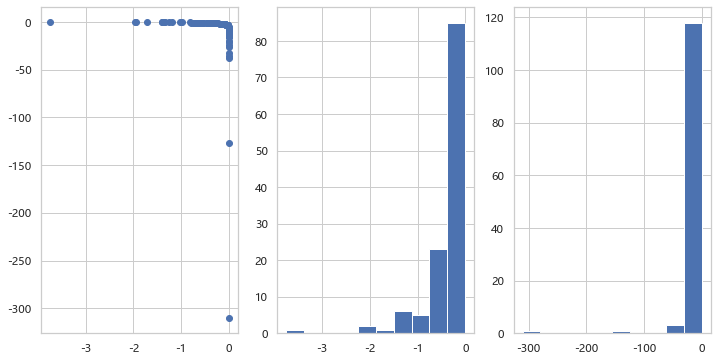

In [245]:
plt.figure(figsize=(12,6))
plt.subplot(131)
plt.scatter(logreg.predict_log_proba(X)[:,0],logreg.predict_log_proba(X)[:,1])
plt.subplot(132)
plt.hist(logreg.predict_log_proba(X)[:,0])#logreg.predict_log_proba(X)[:,1])
plt.subplot(133)
plt.hist(logreg.predict_log_proba(X)[:,1])

(array([55., 15.,  9., 17.,  9.,  6.,  2.,  6.,  3.,  1.]),
 array([1.33482698e-135, 9.76494499e-002, 1.95298900e-001, 2.92948350e-001,
        3.90597800e-001, 4.88247250e-001, 5.85896699e-001, 6.83546149e-001,
        7.81195599e-001, 8.78845049e-001, 9.76494499e-001]),
 <BarContainer object of 10 artists>)

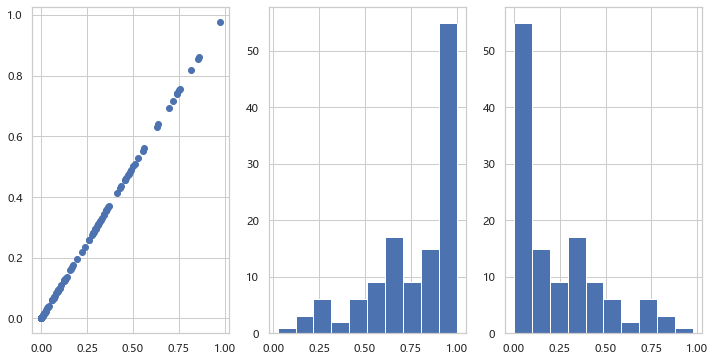

In [246]:
plt.figure(figsize=(12,6))
plt.subplot(131)
plt.scatter(logreg.predict_proba(X)[:,1],logreg.predict_proba(X)[:,-1])
plt.subplot(132)
plt.hist(logreg.predict_proba(X)[:,0])
plt.subplot(133)
plt.hist(logreg.predict_proba(X)[:,1])

In [247]:
#查看回归系数
logreg.coef_,logreg.intercept_

(array([[-25.61266403,  -5.20151557,  -0.15725379,  -0.27277005,
           0.15366704,  -0.46857843,   0.26616055,   0.86001137,
           0.03776194]]),
 array([-7.83177219]))

In [249]:
a11['违约概率logistics']=logreg.predict_proba(X)[:,1]
a11.to_excel('附件1的违约概率logistics.xlsx',index=False)
a11

,企业代号,企业名称,信誉评级,是否违约,违约概率logistics
0,E1,***电器销售有限公司,A,否,1.334827e-135
1,E2,***技术有限责任公司,A,否,2.550628e-17
2,E3,***电子(中国)有限公司***分公司,C,否,2.537392e-16
3,E4,***发展有限责任公司,C,否,1.176186e-55
4,E5,***供应链管理有限公司,B,否,1.900200e-07
...,...,...,...,...,...
118,E119,***药房,D,是,5.029579e-01
119,E120,***陈列广告有限公司,D,是,9.764945e-01
120,E121,***药业连锁有限公司***药店,D,是,3.692718e-01
121,E122,***商贸有限责任公司,D,是,4.816082e-01


### XGBoost

In [466]:
from xgboost.sklearn import XGBClassifier
clf1 = XGBClassifier(n_jobs=-1)
clf1.fit(X_train,Y_train)
#训练集准确率#训练集准确率
clf1.score(X_train,Y_train),clf1.score(X_test,Y_test)

[09:23:33] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


(1.0, 0.92)

In [251]:
clf1.predict_proba(X).shape

(123, 2)

In [708]:
clf1.feature_importances_

array([0.39717597, 0.0932602 , 0.08058815, 0.04216314, 0.04646924,
       0.10260215, 0.10458297, 0.10759313, 0.02556507], dtype=float32)

(array([92.,  3.,  0.,  2.,  0.,  0.,  0.,  2.,  6., 18.]),
 array([5.96648024e-04, 1.00341536e-01, 2.00086430e-01, 2.99831331e-01,
        3.99576217e-01, 4.99321103e-01, 5.99066019e-01, 6.98810875e-01,
        7.98555791e-01, 8.98300648e-01, 9.98045564e-01], dtype=float32),
 <BarContainer object of 10 artists>)

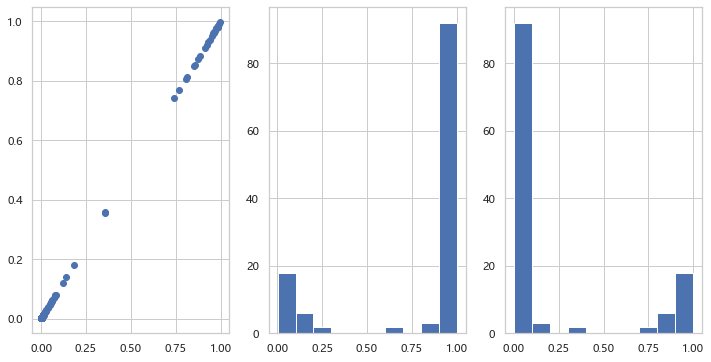

In [253]:
plt.figure(figsize=(12,6))
plt.subplot(131)
plt.scatter(clf1.predict_proba(X)[:,1],clf1.predict_proba(X)[:,-1])
plt.subplot(132)
plt.hist(clf1.predict_proba(X)[:,0])
plt.subplot(133)
plt.hist(clf1.predict_proba(X)[:,1])

In [254]:
a11['违约概率XGBoost']=clf1.predict_proba(X)[:,1]
a11.to_excel('附件1的违约概率logistics和XGBoost.xlsx',index=False)
a11

,企业代号,企业名称,信誉评级,是否违约,违约概率logistics,违约概率XGBoost
0,E1,***电器销售有限公司,A,否,1.334827e-135,0.011311
1,E2,***技术有限责任公司,A,否,2.550628e-17,0.000637
2,E3,***电子(中国)有限公司***分公司,C,否,2.537392e-16,0.012899
3,E4,***发展有限责任公司,C,否,1.176186e-55,0.001390
4,E5,***供应链管理有限公司,B,否,1.900200e-07,0.070231
...,...,...,...,...,...,...
118,E119,***药房,D,是,5.029579e-01,0.984410
119,E120,***陈列广告有限公司,D,是,9.764945e-01,0.983970
120,E121,***药业连锁有限公司***药店,D,是,3.692718e-01,0.982389
121,E122,***商贸有限责任公司,D,是,4.816082e-01,0.962655


In [256]:
clf1.feature_importances_

array([0.4656755 , 0.06263819, 0.08721664, 0.03586894, 0.02949104,
       0.06882296, 0.11149567, 0.09946601, 0.0393251 ], dtype=float32)

In [259]:
[(rank,rank_data['是否违约'][rank_data['是否违约']=='是'].count(),rank_data['是否违约'].count())for rank,rank_data in a11.groupby('信誉评级')]

[('A', 0, 27), ('B', 1, 38), ('C', 2, 34), ('D', 24, 24)]

### MLP

In [636]:
from sklearn.neural_network import MLPClassifier

md = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(10,3))
md.fit(X_train, Y_train); 
print(md.score(X_train,Y_train));print(md.score(X_test,Y_test));

0.9081632653061225
0.84


In [638]:
md.hi

(10, 3)

In [394]:
md.predict_proba(X)

array([[1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 1.07040812e-032],
       [1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 1.36255808e-227],
       [1.00000000e+000, 1.34013120e-232],
       [1.00000000e+000, 2.35152345e-155],
       [9.99999978e-001, 2.23159271e-008],
       [1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 3.75708300e-293],
       [8.04692557e-001, 1.95307443e-001],
       [1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 1.42367370e-189],
       [8.07291640e-001, 1.92708360e-001],
       [1.00000000e+000, 1.58710913e-111],
       [1.00000000e+000, 1.61982927e-149],
       [8.06961652e-001, 1.93038348e-001],
       [1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 1.60259810e-226],
       [1.00000000e+000, 1.11733547e-129],
       [1.0

(array([78.,  4., 12.,  3.,  1.,  1.,  2.,  0.,  3., 19.]),
 array([7.16679233e-199, 1.00000000e-001, 2.00000000e-001, 3.00000000e-001,
        4.00000000e-001, 5.00000000e-001, 6.00000000e-001, 7.00000000e-001,
        8.00000000e-001, 9.00000000e-001, 1.00000000e+000]),
 <BarContainer object of 10 artists>)

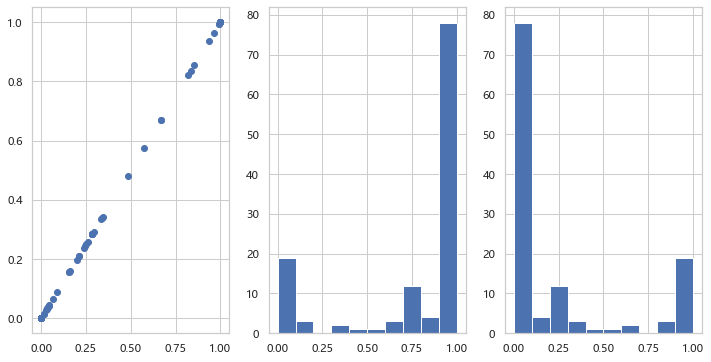

In [407]:
plt.figure(figsize=(12,6))
plt.subplot(131)
plt.scatter(md.predict_proba(X)[:,1],md.predict_proba(X)[:,-1])
plt.subplot(132)
plt.hist(md.predict_proba(X)[:,0],bins=10)
plt.subplot(133)
plt.hist(md.predict_proba(X)[:,1])

# 信誉评级

In [673]:
a11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   企业代号           123 non-null    object 
 1   企业名称           123 non-null    object 
 2   信誉评级           123 non-null    object 
 3   是否违约           123 non-null    object 
 4   违约概率logistics  123 non-null    float64
 5   违约概率XGBoost    123 non-null    float32
dtypes: float32(1), float64(1), object(4)
memory usage: 5.4+ KB


In [677]:
a11[a11['是否违约']=='是'].groupby('信誉评级').size()

信誉评级
B     1
C     2
D    24
dtype: int64

In [684]:
z_1["A"]=a11['信誉评级'].values
z_1

,销售收入,进货支出,收入进步因子,进项负数发票占比,进项作废发票占比,供方市场集中度,销项负数发票占比,销项作废发票占比,需方市场集中度,A,B,C,D
企业代号,,,,,,,,,,,,,
E1,9.570315,10.979130,-0.248520,1.064436,1.057429,-0.682533,0.130129,-0.855291,-0.772359,A,0,0,0
E2,1.158719,0.130766,-0.199667,-0.141002,-0.204031,-0.315321,0.132387,-0.350663,1.649774,A,0,0,0
E3,1.134189,-0.053591,-0.532965,-0.076144,0.556137,-0.665053,3.938355,-0.963183,-0.772307,C,0,1,0
E4,4.542379,0.467584,-0.729142,0.035978,1.454680,-0.476139,-0.450515,-0.321326,-0.762571,C,0,1,0
E5,0.232483,0.228119,1.205426,0.122309,0.429674,-0.660637,-0.320966,-0.630113,-0.758200,B,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
E119,-0.265049,-0.146033,-0.047169,-0.269072,-0.931496,-0.642570,-0.547296,0.214032,0.482772,D,0,0,1
E120,-0.264723,-0.146387,-0.401996,-0.511547,-0.001604,1.277696,-0.547296,5.287957,0.290624,D,0,0,1
E121,-0.264884,-0.144416,-0.484994,1.016047,-1.051483,-0.567873,-0.547296,0.035857,-0.739993,D,0,0,1


In [690]:
pd.DataFrame(
    np.array([(rank, rank_data.agg(np.mean))
              for rank, rank_data in z_1.iloc[:, :-3].groupby("A")
              ])).to_csv('信誉评级数据分析.csv', index=False)
pd.DataFrame(
    np.array([(rank, rank_data.agg(np.mean))
              for rank, rank_data in z_1.iloc[:, :-3].groupby("A")]))

,0,1
0,A,销售收入 0.449264 进货支出 0.370637 收入进步...
1,B,销售收入 -0.138899 进货支出 -0.086074 收入进步...
2,C,销售收入 -0.019524 进货支出 -0.097704 收入进步...
3,D,销售收入 -0.257840 进货支出 -0.142269 收入进步...


In [697]:
np.array(
        [(rank, rank_data.agg(np.median))
              for rank, rank_data in z_1.iloc[:, :-3].groupby("A")
              ])

array([['A',
        销售收入        0.023484
进货支出       -0.103335
收入进步因子     -0.321761
进项负数发票占比   -0.202317
进项作废发票占比    0.023275
供方市场集中度    -0.605608
销项负数发票占比   -0.307387
销项作废发票占比   -0.353550
需方市场集中度    -0.659360
dtype: float64],
       ['B',
        销售收入       -0.211330
进货支出       -0.135957
收入进步因子     -0.228252
进项负数发票占比   -0.190632
进项作废发票占比   -0.082932
供方市场集中度    -0.458439
销项负数发票占比   -0.328133
销项作废发票占比   -0.393339
需方市场集中度    -0.239874
dtype: float64],
       ['C',
        销售收入       -0.230945
进货支出       -0.142109
收入进步因子     -0.194448
进项负数发票占比   -0.324306
进项作废发票占比   -0.258879
供方市场集中度    -0.388208
销项负数发票占比    0.007426
销项作废发票占比   -0.300805
需方市场集中度    -0.526968
dtype: float64],
       ['D',
        销售收入       -0.263949
进货支出       -0.146098
收入进步因子     -0.367016
进项负数发票占比   -0.511547
进项作废发票占比   -0.618237
供方市场集中度    -0.153811
销项负数发票占比   -0.477351
销项作废发票占比    0.467060
需方市场集中度    -0.212368
dtype: float64]], dtype=object)

In [701]:
pd.DataFrame(
    np.array(
        [(rank, rank_data.agg(np.median))
              for rank, rank_data in z_1.iloc[:, :-3].groupby("A")
              ])
    ).to_excel('信誉评级数据分析.xlsx', index=False)
# pd.DataFrame(
#     np.array(
#         [(rank, rank_data.agg(np.median))
#               for rank, rank_data in z_1.iloc[:, :-3].groupby("A")])
# )

In [ ]:
print(['fizzbuzz' if (i % 5 == 0 and i % 3 == 0)
        else 'fizz' if i % 5 == 0 
        else 'buzz' if i % 3 == 0 
        else i for i in range(1, 100)])

In [412]:
rank=[0 if  i== 'A'  else 1 if i=='B'else 2  if i=='C' else 3  for  i  in a11['信誉评级']]
rank

[0,
 0,
 2,
 2,
 1,
 0,
 0,
 0,
 0,
 1,
 2,
 1,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 2,
 0,
 0,
 1,
 2,
 1,
 0,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 2,
 2,
 2,
 0,
 1,
 2,
 1,
 2,
 2,
 0,
 2,
 2,
 1,
 3,
 2,
 0,
 2,
 2,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 1,
 2,
 0,
 3,
 1,
 0,
 1,
 2,
 2,
 0,
 0,
 2,
 0,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 1,
 3,
 3,
 3,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3]

In [413]:
# 1.加载数据
X = z_1.values
R = rank
# 2.拆分测试集、训练集。
X_train, X_test, R_train, R_test = train_test_split(X, R, test_size=0.2, random_state=0)# 设置随机数种子，以便比较结果。

## MLPClassifier

In [434]:
from sklearn.neural_network import MLPClassifier

md_r = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5,3,4))
md_r.fit(X_train, R_train); 
print(md_r.score(X_train,R_train));print(md_r.score(X_test,R_test));print(md_r.loss_)

0.673469387755102
0.32
0.8137562151366954


In [433]:
md_r.predict_proba(X)[:5]

array([[3.07052047e-01, 2.03291519e-01, 2.72619740e-01, 2.17036695e-01],
       [3.07052047e-01, 2.03291519e-01, 2.72619740e-01, 2.17036695e-01],
       [3.07052047e-01, 2.03291519e-01, 2.72619740e-01, 2.17036695e-01],
       [3.07052047e-01, 2.03291519e-01, 2.72619740e-01, 2.17036695e-01],
       [6.62203950e-08, 9.99999934e-01, 2.64085393e-18, 6.10535548e-21]])

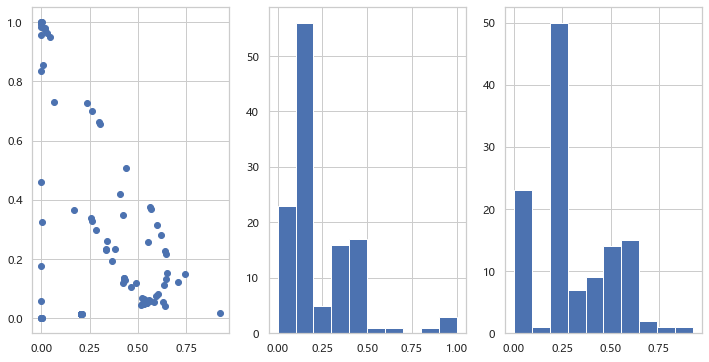

In [470]:
def display_prob(md,X):
    plt.figure(figsize=(12,6))
    plt.subplot(131)
    plt.scatter(md.predict_proba(X)[:,1],md.predict_proba(X)[:,-1])
    plt.subplot(132)
    plt.hist(md.predict_proba(X)[:,0],bins=10)
    plt.subplot(133)
    plt.hist(md.predict_proba(X)[:,1])
display_prob(md=md_r,X=X)

## XGBoost

In [705]:
from xgboost.sklearn import XGBClassifier
clf_r = XGBClassifier(n_jobs=-1)
clf_r.fit(X_train,R_train)
#训练集准确率#训练集准确率
clf_r.score(X_train,R_train),clf_r.score(X_test,R_test)

[15:32:00] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


(1.0, 0.56)

In [431]:
clf_r.predict_proba(X).shape

(123, 4)

In [432]:
clf_r.predict_proba(X)[:5]

array([[9.8517334e-01, 4.6397098e-03, 6.0910620e-03, 4.0959395e-03],
       [9.7535771e-01, 9.6616745e-03, 1.4685862e-02, 2.9471653e-04],
       [3.5043859e-01, 2.1817508e-01, 4.1013253e-01, 2.1253778e-02],
       [1.1502860e-02, 1.7062251e-02, 9.6964216e-01, 1.7926794e-03],
       [5.8343049e-02, 9.2026526e-01, 4.1247788e-03, 1.7266868e-02]],
      dtype=float32)

In [707]:
clf_r.feature_importances_

array([0.20755722, 0.15743235, 0.0788224 , 0.03974069, 0.08688585,
       0.15445007, 0.0887939 , 0.11827486, 0.06804272], dtype=float32)

## 附件2信誉评级

In [460]:
z_2=zscore(indic_2.fillna(0.874469))
z_2=pd.DataFrame(data=z_2,
                       columns=[
                           '销售收入', '进货支出', '收入进步因子', '进项负数发票占比',
                           '进项作废发票占比', '供方市场集中度', '销项负数发票占比',
                           '销项作废发票占比', '需方市场集中度'
                       ],index=names_2)
print(z_2.describe())
# z_2.to_excel('附件',index=False)
z_2

               销售收入          进货支出        收入进步因子      进项负数发票占比      进项作废发票占比  \
count  3.020000e+02  3.020000e+02  3.020000e+02  3.020000e+02  3.020000e+02   
mean   1.544019e-17  5.679783e-17  9.594974e-17 -1.360207e-16  1.994358e-16   
std    1.001660e+00  1.001660e+00  1.001660e+00  1.001660e+00  1.001660e+00   
min   -5.319093e-01 -3.544935e-01 -8.101729e-01 -6.499869e-01 -1.036836e+00   
25%   -5.063159e-01 -3.476582e-01 -3.967104e-01 -6.499869e-01 -5.810432e-01   
50%   -3.282260e-01 -2.686503e-01 -2.719686e-01 -2.864750e-01 -1.208225e-01   
75%    2.104554e-01  4.668652e-02 -5.473729e-03  1.633743e-01  3.237766e-01   
max    9.645011e+00  1.200494e+01  8.482678e+00  8.730141e+00  7.132143e+00   

            供方市场集中度      销项负数发票占比      销项作废发票占比       需方市场集中度  
count  3.020000e+02  3.020000e+02  3.020000e+02  3.020000e+02  
mean  -7.885524e-17  8.565628e-17 -8.675915e-17 -4.043859e-17  
std    1.001660e+00  1.001660e+00  1.001660e+00  1.001660e+00  
min   -6.227026e-01 -7.469583e-0

,销售收入,进货支出,收入进步因子,进项负数发票占比,进项作废发票占比,供方市场集中度,销项负数发票占比,销项作废发票占比,需方市场集中度
企业代号,,,,,,,,,
E124,7.686028,10.057005,0.025373,1.214078,2.992524,-0.420497,0.599150,0.173621,0.884745
E125,9.645011,12.004944,-0.105150,1.227148,3.008999,-0.411547,0.370257,0.061326,0.844687
E126,5.005686,1.051703,-0.109271,-0.122025,0.066666,-0.528844,0.127783,0.292884,-0.771921
E127,5.579965,-0.335036,-0.459671,-0.520606,-0.450923,-0.433234,-0.705785,-0.708501,-0.208703
E128,1.721460,-0.241294,-0.070025,-0.184183,-0.144384,-0.529697,-0.746958,-0.379941,-0.414665
...,...,...,...,...,...,...,...,...,...
E421,-0.530003,-0.354162,-0.560203,-0.649987,-1.036836,0.670907,-0.746958,-0.677708,0.037481
E422,-0.531909,-0.354489,1.692474,-0.649987,-1.036836,1.042601,-0.746958,-0.195026,-0.378194
E423,-0.531470,-0.353775,-0.464294,3.816741,-1.036836,-0.052499,-0.746958,0.120713,0.130811


In [464]:
r_pred=clf_r.predict(z_2.values)
r_pred.shape

(302,)

### 附件2违约预测

146


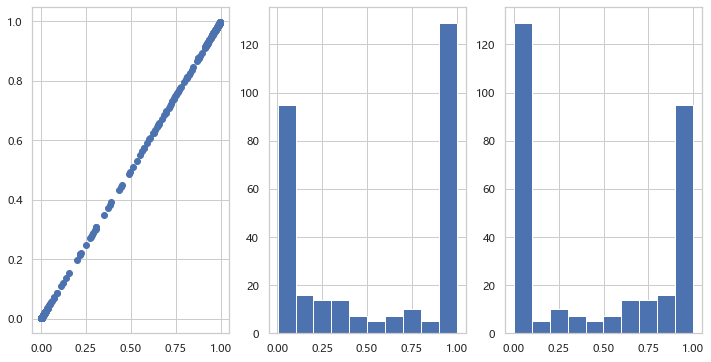

In [474]:
defaut_pred=clf1.predict_proba(z_2.values)
print(clf1.predict(z_2.values).sum())
display_prob(md=clf1,X=z_2.values)

85
0.28052805280528054


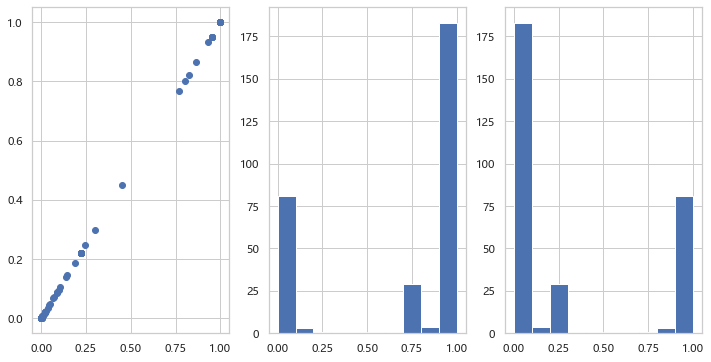

In [479]:
print(md.predict(z_2.values).sum())
print(85/303)
display_prob(md=md,X=z_2.values)

In [713]:
a21['信誉评级预测']=['A'if i ==0 else 'B' if i==1 else 'C'if i==2 else 3 for i in r_pred]
a21['违约概率预测']=md.predict_proba(z_2.values)[:,1]
# a21.to_excel('附件2信誉评级和违约概率预测.xlsx',index=False)
a21

,企业代号,企业名称,信誉评级预测,违约概率预测
0,E124,个体经营E124,A,0.000000e+00
1,E125,个体经营E125,A,0.000000e+00
2,E126,个体经营E126,A,2.551391e-198
3,E127,个体经营E127,B,1.782559e-202
4,E128,个体经营E128,A,5.507415e-80
...,...,...,...,...
297,E421,***保温材料有限公司,3,1.219393e-06
298,E422,***童装店,3,8.967142e-21
299,E423,***通风设备有限公司,3,1.043287e-29
300,E424,***贸易有限公司,3,9.853976e-01


# 主成分

<AxesSubplot:>

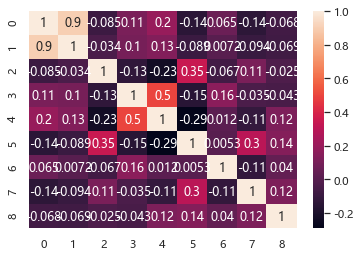

In [438]:
sns.heatmap(np.corrcoef(X.T),annot=True)

In [440]:
b=np.delete(X,1,axis=1) #删除第1列数据，即删除指标x2
b.shape

(123, 8)

In [439]:
r=np.corrcoef(b.T) #数据标准化后，计算相关系数阵
d,e=np.linalg.eig(r) #求相关系数矩阵r的特征值和特征向量
rate=d/d.sum()  #计算各主成分的贡献率
print("特征值为：",d)
print("特征向量为：\n",e)
print("各主成分的贡献率为：",rate)

特征值为： [2.0343641  0.41019624 1.24861233 1.05081623 0.80562884 0.99465779
 0.89920458 0.5565199 ]
特征向量为：
 [[ 0.2902253  -0.11167179 -0.10436261 -0.24599645 -0.32806362  0.29612835
  -0.7978543   0.00191117]
 [-0.38244049  0.01243757  0.05747101 -0.32900994  0.53956979  0.46773998
  -0.09632049 -0.47205957]
 [ 0.42420399 -0.59093536  0.41396508 -0.16298879  0.05955173  0.35753857
   0.34171532  0.15736691]
 [ 0.50233729  0.69949765  0.38183334  0.16014987  0.22279648  0.18970536
  -0.03570834 -0.0037583 ]
 [-0.46765039  0.19076994  0.33418929 -0.27627063 -0.03196985  0.13011932
  -0.09216063  0.72832363]
 [ 0.14507185  0.19119025  0.13193246 -0.79066351 -0.20948621 -0.41076597
   0.18566163 -0.22969999]
 [-0.3060194   0.06105264  0.46708138  0.23065101 -0.64658243  0.21968137
   0.09438009 -0.39499803]
 [-0.06185596 -0.26869844  0.56691099  0.15604722  0.29168242 -0.54386187
  -0.42922606 -0.11461589]]
各主成分的贡献率为： [0.25429551 0.05127453 0.15607654 0.13135203 0.1007036  0.12433222
 0.11240

In [441]:
print(sum(rate[np.argwhere(d>1)]))

array([0.54172408])

In [450]:
k=6#提取6个主成分
indice=np.argsort(-d)[:k]
print(indice)
print(sum(rate[indice]))
print(rate[indice])
F=e[indice]
print(e[indice])

[0 2 3 5 6 4]
0.8791604831562757
[0.25429551 0.15607654 0.13135203 0.12433222 0.11240057 0.1007036 ]
[[ 0.2902253  -0.11167179 -0.10436261 -0.24599645 -0.32806362  0.29612835
  -0.7978543   0.00191117]
 [ 0.42420399 -0.59093536  0.41396508 -0.16298879  0.05955173  0.35753857
   0.34171532  0.15736691]
 [ 0.50233729  0.69949765  0.38183334  0.16014987  0.22279648  0.18970536
  -0.03570834 -0.0037583 ]
 [ 0.14507185  0.19119025  0.13193246 -0.79066351 -0.20948621 -0.41076597
   0.18566163 -0.22969999]
 [-0.3060194   0.06105264  0.46708138  0.23065101 -0.64658243  0.21968137
   0.09438009 -0.39499803]
 [-0.46765039  0.19076994  0.33418929 -0.27627063 -0.03196985  0.13011932
  -0.09216063  0.72832363]]


In [449]:
score_mat=b.dot(F.T) #计算主成分得分矩阵
score_mat.shape

(123, 6)

各评价对象的得分为：
 (123,)


(array([ 2.,  1.,  3., 12., 29., 55., 13.,  4.,  2.,  2.]),
 array([-1.27497438, -1.02716736, -0.77936034, -0.53155331, -0.28374629,
        -0.03593927,  0.21186775,  0.45967477,  0.70748179,  0.95528881,
         1.20309583]),
 <BarContainer object of 10 artists>)

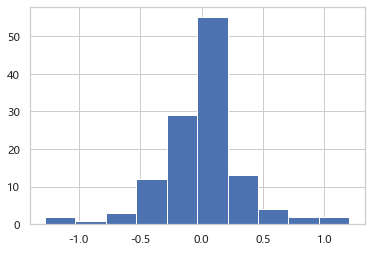

In [454]:
score1=score_mat.dot(rate[0:k])  #计算各评价对象的得分
# score2=-score1  #通过观测，调整得分的正负号
print("各评价对象的得分为：\n",score1.shape)
plt.hist(score1)

# 第三题

## 打分预备

In [503]:
df_dict=pd.read_excel('打分对照表.xlsx',sheet_name='Sheet3').iloc[:,:2]
df_dict

,代号,行业
0,A,农、林、牧、渔业
1,B,采矿业
2,C,制造业
3,D,电力、热力、燃气及水生产和供应业
4,E,建筑业
5,F,批发和零售业
6,G,交通运输、仓储和邮政业
7,H,住宿和餐饮业
8,I,信息传输、软件和信息技术服务业
9,J,金融业


In [504]:
df_category=pd.read_excel('打分对照表.xlsx',sheet_name='Sheet2').iloc[:,:4]
df_category

,企业代号,企业名称,具体类别,产业类别
0,E124,个体经营E124,Z,4
1,E125,个体经营E125,Z,4
2,E126,个体经营E126,Z,4
3,E127,个体经营E127,Z,4
4,E128,个体经营E128,Z,4
...,...,...,...,...
297,E421,***保温材料有限公司,C,2
298,E422,***童装店,F,31
299,E423,***通风设备有限公司,C,2
300,E424,***贸易有限公司,F,31


In [505]:
map_dict=dict(zip(df_dict.values[:,0],df_dict.values[:,1]))
len(map_dict)

21

In [506]:
df_category['行业名称']=df_category.iloc[:,2].map(map_dict)#apply(lambda x :map_dict[x] if x in map_dict.keys else x)
df_category.to_csv('行业名称.csv',index=False)
df_category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   企业代号    302 non-null    object
 1   企业名称    302 non-null    object
 2   具体类别    302 non-null    object
 3   产业类别    302 non-null    int64 
 4   行业名称    302 non-null    object
dtypes: int64(1), object(4)
memory usage: 11.9+ KB


In [508]:
df_category.iloc[:,-1].nunique()

18

## 打分转化函数

In [716]:
y=[-0.5,-0.25,-0.15,-0.1,-0.05,0,0.05,
   0.1,0.15,0.25,0.5]
len(y)

11

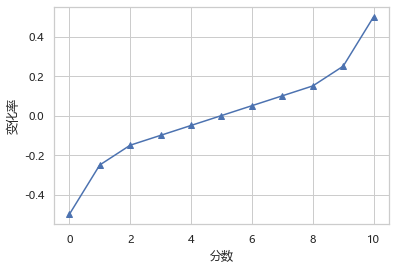

In [734]:
plt.plot(range(11),y,marker='^')
#plt.yticks(ticks=range(len(y)),labels=[i for i in y])
#plt.grid(False)
plt.xlabel('分数')
plt.ylabel('变化率')
plt.show()

## 调整指标

In [660]:
df_adj=pd.read_excel('pro2pre.xlsx')
df_adj

,企业代号,企业名称,信誉评级预测,违约概率预测,最终得分,具体类别,收支,市场稳定,进步因子,对应类别,factor1,factor2,factor3
0,E124,个体经营E124,0,1.479037e-118,0.824074,Z,0.984573,0.823649,0.089913,A,-0.033333,-0.033333,-0.016667
1,E125,个体经营E125,0,6.415670e-138,0.832943,Z,1.000000,0.828448,0.075867,B,-0.066667,-0.066667,0.016667
2,E126,个体经营E126,0,1.823919e-36,0.791100,Z,0.890867,0.939260,0.075424,C,-0.066667,-0.033333,0.016667
3,E127,个体经营E127,1,6.684340e-37,0.687190,Z,0.729281,0.948611,0.037717,D,0.016667,-0.016667,0.000000
4,E128,个体经营E128,0,5.776832e-12,0.710705,Z,0.756402,0.952134,0.079647,E,-0.133333,-0.083333,-0.066667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,E421,***保温材料有限公司,3,2.224042e-01,0.358678,C,0.245536,0.845089,0.026899,NaN,NaN,NaN,NaN
298,E422,***童装店,3,6.782840e-23,0.244147,F,0.020859,0.814926,0.269309,NaN,NaN,NaN,NaN
299,E423,***通风设备有限公司,3,1.000000e+00,0.353076,C,0.228130,0.861310,0.037220,NaN,NaN,NaN,NaN
300,E424,***贸易有限公司,3,1.000000e+00,0.387780,F,0.285962,0.835670,0.071453,NaN,NaN,NaN,NaN


In [661]:
factor=df_adj.iloc[:,-4:].dropna()
factor

,对应类别,factor1,factor2,factor3
0,A,-0.033333,-0.033333,-0.016667
1,B,-0.066667,-0.066667,0.016667
2,C,-0.066667,-0.033333,0.016667
3,D,0.016667,-0.016667,0.000000
4,E,-0.133333,-0.083333,-0.066667
5,F,-0.150000,-0.083333,-0.050000
6,G,-0.150000,-0.033333,-0.033333
7,H,-0.400000,-0.083333,-0.100000
8,I,0.150000,0.050000,0.133333
9,J,-0.033333,0.016667,0.000000


In [662]:
change_dic=dict(zip(factor.values[:,0],1+factor.values[:,1:]))
change_dic

{'A': array([0.966666667, 0.966666667, 0.983333333], dtype=object),
 'B': array([0.933333333, 0.933333333, 1.016666667], dtype=object),
 'C': array([0.933333333, 0.966666667, 1.016666667], dtype=object),
 'D': array([1.016666667, 0.983333333, 1.0], dtype=object),
 'E': array([0.8666666670000001, 0.916666667, 0.933333333], dtype=object),
 'F': array([0.85, 0.916666667, 0.95], dtype=object),
 'G': array([0.85, 0.966666667, 0.966666667], dtype=object),
 'H': array([0.6, 0.916666667, 0.9], dtype=object),
 'I': array([1.15, 1.05, 1.133333333], dtype=object),
 'J': array([0.966666667, 1.016666667, 1.0], dtype=object),
 'K': array([0.933333333, 0.966666667, 0.95], dtype=object),
 'L': array([0.8666666670000001, 0.95, 1.016666667], dtype=object),
 'M': array([0.983333333, 1.033333333, 1.083333333], dtype=object),
 'N': array([1.0, 0.983333333, 1.0], dtype=object),
 'O': array([0.933333333, 0.983333333, 0.983333333], dtype=object),
 'Q': array([1.2, 1.016666667, 1.116666667], dtype=object),
 'R

In [663]:
score_raw=df_adj.iloc[:,5:9]
score_raw

,具体类别,收支,市场稳定,进步因子
0,Z,0.984573,0.823649,0.089913
1,Z,1.000000,0.828448,0.075867
2,Z,0.890867,0.939260,0.075424
3,Z,0.729281,0.948611,0.037717
4,Z,0.756402,0.952134,0.079647
...,...,...,...,...
297,C,0.245536,0.845089,0.026899
298,F,0.020859,0.814926,0.269309
299,C,0.228130,0.861310,0.037220
300,F,0.285962,0.835670,0.071453


In [665]:
score_raw['change']=score_raw.iloc[:,0].map(change_dic)
score_raw.to_excel('score_raw.xlsx',index=False)
score_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   具体类别    302 non-null    object 
 1   收支      302 non-null    float64
 2   市场稳定    302 non-null    float64
 3   进步因子    302 non-null    float64
 4   change  302 non-null    object 
dtypes: float64(3), object(2)
memory usage: 11.9+ KB


In [668]:
score_adj=pd.DataFrame(score_raw)
score_adj#.iloc[:,-1]

,具体类别,收支,市场稳定,进步因子,change
0,Z,0.902526,0.823649,0.089913,"[0.916666667, 0.916666667, 0.95]"
1,Z,0.916667,0.828448,0.075867,"[0.916666667, 0.916666667, 0.95]"
2,Z,0.816628,0.939260,0.075424,"[0.916666667, 0.916666667, 0.95]"
3,Z,0.668508,0.948611,0.037717,"[0.916666667, 0.916666667, 0.95]"
4,Z,0.693369,0.952134,0.079647,"[0.916666667, 0.916666667, 0.95]"
...,...,...,...,...,...
297,C,0.229167,0.845089,0.026899,"[0.933333333, 0.966666667, 1.016666667]"
298,F,0.017730,0.814926,0.269309,"[0.85, 0.916666667, 0.95]"
299,C,0.212922,0.861310,0.037220,"[0.933333333, 0.966666667, 1.016666667]"
300,F,0.243068,0.835670,0.071453,"[0.85, 0.916666667, 0.95]"


In [671]:
score_adj['收支']=score_raw['收支']*score_adj['change'].map(lambda x: x[0])
score_adj['市场稳定']=score_raw['市场稳定']*score_adj['change'].map(lambda x: x[1])
score_adj['进步因子']=score_raw['进步因子']*score_adj['change'].map(lambda x: x[2])
score_adj.to_excel('score_adj.xlsx',index=False)
score_adj

,具体类别,收支,市场稳定,进步因子,change
0,Z,0.695174,0.692094,0.081146,"[0.916666667, 0.916666667, 0.95]"
1,Z,0.706067,0.696126,0.068470,"[0.916666667, 0.916666667, 0.95]"
2,Z,0.629011,0.789239,0.068070,"[0.916666667, 0.916666667, 0.95]"
3,Z,0.514921,0.797097,0.034040,"[0.916666667, 0.916666667, 0.95]"
4,Z,0.534070,0.800057,0.071881,"[0.916666667, 0.916666667, 0.95]"
...,...,...,...,...,...
297,C,0.186321,0.789689,0.027803,"[0.933333333, 0.966666667, 1.016666667]"
298,F,0.010889,0.684765,0.243051,"[0.85, 0.916666667, 0.95]"
299,C,0.173113,0.804847,0.038471,"[0.933333333, 0.966666667, 1.016666667]"
300,F,0.149274,0.702195,0.064486,"[0.85, 0.916666667, 0.95]"


In [647]:
[ (category, category_scores)for category, category_scores in score_raw.groupby('具体类别')]

[('A',
      具体类别        收支      市场稳定      进步因子
  61     A  0.617148  0.884305  0.056894
  212    A  0.426855  0.779978  0.054314),
 ('B',
      具体类别        收支      市场稳定      进步因子
  64     B  0.798413  0.978259  0.050234
  65     B  0.742415  0.926667  0.104915
  123    B  0.673478  0.966204  0.082757),
 ('C',
      具体类别        收支      市场稳定      进步因子
  11     C  0.773414  0.886959  0.069897
  12     C  0.828062  0.973408  0.108409
  17     C  0.791831  0.954198  0.064162
  21     C  0.829855  0.962896  0.053445
  22     C  0.838337  0.934536  0.059350
  27     C  0.730495  0.917228  0.057977
  33     C  0.772761  0.791967  0.108726
  36     C  0.869887  0.935254  0.051613
  50     C  0.805472  0.970241  0.048436
  51     C  0.798682  0.954264  0.051643
  57     C  0.799803  0.970028  0.060566
  59     C  0.742768  0.836715  0.075847
  68     C  0.715552  0.815671  0.115135
  72     C  0.771829  0.957335  0.047099
  73     C  0.842838  0.965150  0.064898
  79     C  0.728983  0.817277  